In [ ]:
#forward 

In [15]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import datasets

In [16]:
train_pre_stand = pd.read_csv("./data/train.csv")
submission = pd.read_csv("./data/sample_submission.csv")
sale_price_pred = pd.read_csv("./data/both_backward_submission.csv")
submission['SalePrice'] = sale_price_pred
submission.head()

,Id,SalePrice
0,1461,-0.669052
1,1462,-0.070309
2,1463,0.232207
3,1464,0.461488
4,1465,0.451238


In [17]:
#inverse transform
from sklearn.preprocessing import StandardScaler
#Re-Train Scaler
scaler = StandardScaler()
scaler = scaler.fit(np.log(train_pre_stand[['SalePrice']]))


# inverse transform on transformed price
submission['SalePrice'] = (np.exp(scaler.inverse_transform(submission['SalePrice']))).round(1)
submission.to_csv("./data/both_backward_submission_xfrm.csv",index = False)

In [18]:
submission['SalePrice'].head()

0    127629.7
1    162101.1
2    182914.6
3    200452.0
4    199633.2
Name: SalePrice, dtype: float64

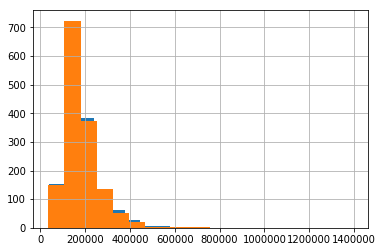

In [22]:
submission['SalePrice'].hist(bins = 20)
train_pre_stand['SalePrice'].hist()


